#importing the required libraries and getting the data

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib as plt  



In [3]:
df = pd.read_csv("bank-additional-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#handling NAN and Unknown values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#we notice there is not any  Null-containing columns, and now we will check for columns with "unknown"
for i in range (len(df.columns)):
  if "unknown" in df.iloc[: ,i].value_counts().index:
    print("unknown detected in colum num" , i)
  else:
    print("no unknowns detected")

no unknowns detected
unknown detected in colum num 1
unknown detected in colum num 2
unknown detected in colum num 3
unknown detected in colum num 4
unknown detected in colum num 5
unknown detected in colum num 6
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected


In [6]:
mydf = df.iloc[: ,1:7]
mydf 
#all columns that contain"unknown"

,job,marital,education,default,housing,loan
0,housemaid,married,basic.4y,no,no,no
1,services,married,high.school,unknown,no,no
2,services,married,high.school,no,yes,no
3,admin.,married,basic.6y,no,no,no
4,services,married,high.school,no,no,yes
...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no
41184,blue-collar,married,professional.course,no,no,no
41185,retired,married,university.degree,no,yes,no
41186,technician,married,professional.course,no,no,no


In [7]:
for i in range(len(mydf.columns)):
  print(mydf[df.iloc[:,i] == "unknown"])

# DataFrames of unknown instances

Empty DataFrame
Columns: [job, marital, education, default, housing, loan]
Index: []
           job   marital            education  default  housing     loan
29     unknown   married    university.degree  unknown  unknown  unknown
35     unknown   married             basic.4y  unknown      yes       no
73     unknown   married              unknown  unknown       no       no
91     unknown   married              unknown  unknown      yes       no
144    unknown  divorced          high.school  unknown      yes       no
...        ...       ...                  ...      ...      ...      ...
40370  unknown   married              unknown       no       no       no
40428  unknown   married              unknown       no      yes       no
40656  unknown  divorced              unknown  unknown      yes       no
41005  unknown   married  professional.course       no       no       no
41108  unknown   married              unknown       no       no       no

[330 rows x 6 columns]
               

In [8]:
imp = SimpleImputer(missing_values= "unknown" , strategy='most_frequent')
mostfrequentdf = pd.DataFrame(imp.fit_transform(mydf))
# we replaced the unknown values with the most frequent values with help of simple imputer


In [9]:
mostfrequentdf.rename(columns={0 :'job' , 1 : "marital" , 2 : "education" , 3: "default" ,
                               4: "housing" , 5:"loan"} , inplace = True)
mostfrequentdf

,job,marital,education,default,housing,loan
0,housemaid,married,basic.4y,no,no,no
1,services,married,high.school,no,no,no
2,services,married,high.school,no,yes,no
3,admin.,married,basic.6y,no,no,no
4,services,married,high.school,no,no,yes
...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no
41184,blue-collar,married,professional.course,no,no,no
41185,retired,married,university.degree,no,yes,no
41186,technician,married,professional.course,no,no,no


In [10]:
#now to replace the unknown colums with the newly created most frquent df
# we need to drop the 6 columns from the original Dataset and replace it with the mostfrequentdf
#first we drop the columns with Nan/unknowns
cutdf  = df.drop(columns=df.columns[1:7])
cutdf

,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [11]:

#then we merge every dataframe with the original dataframe

df = pd.concat( [cutdf , mostfrequentdf] ,  axis=1)

In [12]:
#now we have the final data set with no unknown values
df

,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,marital,education,default,housing,loan
0,56,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,housemaid,married,basic.4y,no,no,no
1,57,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,services,married,high.school,no,no,no
2,37,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,services,married,high.school,no,yes,no
3,40,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,admin.,married,basic.6y,no,no,no
4,56,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,retired,married,professional.course,no,yes,no
41184,46,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,blue-collar,married,professional.course,no,no,no
41185,56,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,retired,married,university.degree,no,yes,no
41186,44,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,technician,married,professional.course,no,no,no


In [13]:
# to make sure, we will call the functuion again
for i in range (len(df.columns)):
  if "unknown" in df.iloc[: ,i].value_counts().index:
    print("unknown detected in colum num" , i)
  else:
    print("no unknowns detected")

no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected
no unknowns detected


In [14]:
df.columns

Index(['age', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job', 'marital',
       'education', 'default', 'housing', 'loan'],
      dtype='object')

In [15]:
#rearanging the y colum
df = df[['age', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',  'job', 'marital',
       'education', 'default', 'housing', 'loan' , 'y']]
df

,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,y
0,56,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic.4y,no,no,no,no
1,57,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,no,no
2,37,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,yes,no,no
3,40,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,admin.,married,basic.6y,no,no,no,no
4,56,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,retired,married,professional.course,no,yes,no,yes
41184,46,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,blue-collar,married,professional.course,no,no,no,no
41185,56,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,retired,married,university.degree,no,yes,no,no
41186,44,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,technician,married,professional.course,no,no,no,yes


#handling imbalncing problem

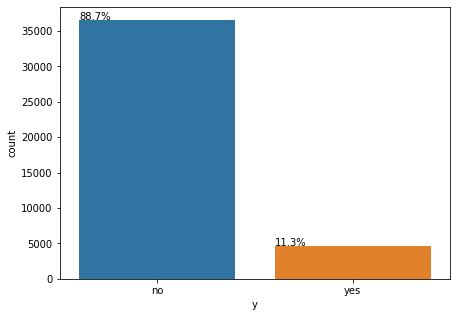

In [16]:


figure(figsize=(7,5))

total=len(df['y'])
plot=sns.countplot(x=df['y'],data=df)
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))

plt.pyplot.show()


In [17]:
info = {'count': df.y.value_counts(), 'percentage': df.y.value_counts(normalize=True)}
pd.DataFrame(data=info )

,count,percentage
no,36548,0.887346
yes,4640,0.112654


In [18]:
# to overcome this imbalcing problem we deided to use SMOTE oversampling algorithim
#first we convert the categorical into numerical with Ordinal encoder

cols = []
for x in df.columns:
    if df.dtypes[x] == np.object:
        cols == cols.append(x)
cols
#prints the columns with categorival dat
 

['contact',
 'month',
 'day_of_week',
 'poutcome',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'y']

In [19]:
#convert
ordc = OrdinalEncoder()
df[cols] = ordc.fit_transform(df[cols])
df


,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,y
0,56,1.0,6.0,1.0,261,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
1,57,1.0,6.0,1.0,149,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,7.0,1.0,3.0,0.0,0.0,0.0,0.0
2,37,1.0,6.0,1.0,226,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,7.0,1.0,3.0,0.0,1.0,0.0,0.0
3,40,1.0,6.0,1.0,151,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,56,1.0,6.0,1.0,307,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,7.0,1.0,3.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.0,7.0,0.0,334,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,5.0,1.0,5.0,0.0,1.0,0.0,1.0
41184,46,0.0,7.0,0.0,383,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0,1.0,5.0,0.0,0.0,0.0,0.0
41185,56,0.0,7.0,0.0,189,2,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,5.0,1.0,6.0,0.0,1.0,0.0,0.0
41186,44,0.0,7.0,0.0,442,1,999,0,1.0,-1.1,94.767,-50.8,1.028,4963.6,9.0,1.0,5.0,0.0,0.0,0.0,1.0


In [20]:
from imblearn.over_sampling import SMOTE
X = df.iloc[:, :-1]
y = df.iloc[: ,-1]
smot = SMOTE(sampling_strategy="minority")
xsm , ysm = smot.fit_resample(X , y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [21]:

pd.DataFrame(ysm, columns = {"y"})


,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
73091,1.0
73092,1.0
73093,1.0
73094,1.0


In [22]:
ysm = pd.DataFrame(ysm, columns = {"y"})

xsm = pd.DataFrame(xsm, columns = X.columns)

df = pd.concat([xsm ,ysm] , axis=1)
df


,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,y
0,56.000000,1.000000,6.000000,1.000000,261.000000,1.000000,999.000000,0.000000,1.0,1.100000,93.994000,-36.400000,4.857000,5191.000000,3.000000,1.000000,0.000000,0.0,0.000000,0.00000,0.0
1,57.000000,1.000000,6.000000,1.000000,149.000000,1.000000,999.000000,0.000000,1.0,1.100000,93.994000,-36.400000,4.857000,5191.000000,7.000000,1.000000,3.000000,0.0,0.000000,0.00000,0.0
2,37.000000,1.000000,6.000000,1.000000,226.000000,1.000000,999.000000,0.000000,1.0,1.100000,93.994000,-36.400000,4.857000,5191.000000,7.000000,1.000000,3.000000,0.0,1.000000,0.00000,0.0
3,40.000000,1.000000,6.000000,1.000000,151.000000,1.000000,999.000000,0.000000,1.0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.00000,0.0
4,56.000000,1.000000,6.000000,1.000000,307.000000,1.000000,999.000000,0.000000,1.0,1.100000,93.994000,-36.400000,4.857000,5191.000000,7.000000,1.000000,3.000000,0.0,0.000000,1.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,38.825223,0.912611,2.825223,1.262166,733.524332,2.825223,999.000000,0.000000,1.0,1.400000,93.876578,-42.123235,4.960612,5228.100000,0.000000,1.000000,6.000000,0.0,0.000000,0.00000,1.0
73092,67.094146,0.000000,5.198936,1.801064,200.204258,1.000000,3.000000,1.900532,2.0,-1.959148,93.297383,-34.332501,0.642858,5009.575317,3.198936,0.099468,0.596807,0.0,1.000000,0.00000,1.0
73093,42.196418,0.000000,2.658166,1.512751,136.239828,1.000000,11.607163,2.000000,2.0,-1.700000,94.182868,-39.958166,0.811288,4991.600000,0.000000,0.341834,6.000000,0.0,1.000000,0.00000,1.0
73094,34.077438,0.346240,2.038719,2.961281,952.000000,1.346240,999.000000,0.000000,1.0,1.400000,93.797511,-38.073566,4.964923,5228.100000,9.000000,1.653760,5.000000,0.0,1.000000,0.65376,1.0


In [23]:
# finally let's revert the dataand get the final result
#revert
df[cols] = ordc.inverse_transform(df[cols])
df

,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,y
0,56.000000,telephone,may,mon,261.000000,1.000000,999.000000,0.000000,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,housemaid,married,basic.4y,no,no,no,no
1,57.000000,telephone,may,mon,149.000000,1.000000,999.000000,0.000000,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,services,married,high.school,no,no,no,no
2,37.000000,telephone,may,mon,226.000000,1.000000,999.000000,0.000000,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,services,married,high.school,no,yes,no,no
3,40.000000,telephone,may,mon,151.000000,1.000000,999.000000,0.000000,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,admin.,married,basic.6y,no,no,no,no
4,56.000000,telephone,may,mon,307.000000,1.000000,999.000000,0.000000,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,38.825223,cellular,dec,mon,733.524332,2.825223,999.000000,0.000000,nonexistent,1.400000,93.876578,-42.123235,4.960612,5228.100000,admin.,married,university.degree,no,no,no,yes
73092,67.094146,cellular,mar,mon,200.204258,1.000000,3.000000,1.900532,success,-1.959148,93.297383,-34.332501,0.642858,5009.575317,housemaid,divorced,basic.4y,no,yes,no,yes
73093,42.196418,cellular,dec,mon,136.239828,1.000000,11.607163,2.000000,success,-1.700000,94.182868,-39.958166,0.811288,4991.600000,admin.,divorced,university.degree,no,yes,no,yes
73094,34.077438,cellular,dec,thu,952.000000,1.346240,999.000000,0.000000,nonexistent,1.400000,93.797511,-38.073566,4.964923,5228.100000,technician,married,professional.course,no,yes,no,yes


In [24]:
#our final data set contains 73096 and it represnt yes and now equally
info = {'count': df.y.value_counts(), 'percentage': df.y.value_counts(normalize=True)}
pd.DataFrame(data=info )

,count,percentage
no,36548,0.5
yes,36548,0.5


#preparing the Data

In [25]:
for i in range (len(cols)):
  print(df[cols[i]].value_counts())

cellular     55921
telephone    17175
Name: contact, dtype: int64
may    19273
jul    13002
aug    10598
jun     8147
nov     6917
apr     5159
mar     3091
dec     2849
oct     2784
sep     1276
Name: month, dtype: int64
thu    17989
mon    16820
tue    14889
fri    13700
wed     9698
Name: day_of_week, dtype: int64
nonexistent    54985
failure        11109
success         7002
Name: poutcome, dtype: int64
admin.           19535
blue-collar      13135
technician        8756
services          6227
management        5363
retired           4855
entrepreneur      3770
student           3561
housemaid         3482
self-employed     3364
unemployed        1048
Name: job, dtype: int64
married     46205
single      17109
divorced     9782
Name: marital, dtype: int64
university.degree      20356
high.school            15388
professional.course    12070
basic.9y               10387
basic.4y                6075
basic.6y                4495
illiterate              4325
Name: education, dtype: int

In [26]:
#the last 4 columns are a yes or no columns, we can encode it with an ordinal encoder
# for the rest we are going to use one hot encoder

In [27]:
#columns for ordinal encoding:
orddf = df[cols].iloc[: , -4:]
orddf

,default,housing,loan,y
0,no,no,no,no
1,no,no,no,no
2,no,yes,no,no
3,no,no,no,no
4,no,no,yes,no
...,...,...,...,...
73091,no,no,no,yes
73092,no,yes,no,yes
73093,no,yes,no,yes
73094,no,yes,no,yes


In [28]:
#columns for one hot encoding:
onedf = df[cols].iloc[: , :-4]
onedf

,contact,month,day_of_week,poutcome,job,marital,education
0,telephone,may,mon,nonexistent,housemaid,married,basic.4y
1,telephone,may,mon,nonexistent,services,married,high.school
2,telephone,may,mon,nonexistent,services,married,high.school
3,telephone,may,mon,nonexistent,admin.,married,basic.6y
4,telephone,may,mon,nonexistent,services,married,high.school
...,...,...,...,...,...,...,...
73091,cellular,dec,mon,nonexistent,admin.,married,university.degree
73092,cellular,mar,mon,success,housemaid,divorced,basic.4y
73093,cellular,dec,mon,success,admin.,divorced,university.degree
73094,cellular,dec,thu,nonexistent,technician,married,professional.course


In [29]:
onedf =pd.get_dummies(onedf , drop_first= True)
onedf

,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
73092,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73093,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
73094,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [30]:
ordc = OrdinalEncoder()
orddf = pd.DataFrame(ordc.fit_transform(orddf) , columns=orddf.columns)
orddf


,default,housing,loan,y
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
73091,0.0,0.0,0.0,1.0
73092,0.0,1.0,0.0,1.0
73093,0.0,1.0,0.0,1.0
73094,0.0,1.0,0.0,1.0


In [31]:
cutdf = df.drop(df[cols] , axis= 1)
cutdf

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.000000,261.000000,1.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.857000,5191.000000
1,57.000000,149.000000,1.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.857000,5191.000000
2,37.000000,226.000000,1.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.857000,5191.000000
3,40.000000,151.000000,1.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.857000,5191.000000
4,56.000000,307.000000,1.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.857000,5191.000000
...,...,...,...,...,...,...,...,...,...,...
73091,38.825223,733.524332,2.825223,999.000000,0.000000,1.400000,93.876578,-42.123235,4.960612,5228.100000
73092,67.094146,200.204258,1.000000,3.000000,1.900532,-1.959148,93.297383,-34.332501,0.642858,5009.575317
73093,42.196418,136.239828,1.000000,11.607163,2.000000,-1.700000,94.182868,-39.958166,0.811288,4991.600000
73094,34.077438,952.000000,1.346240,999.000000,0.000000,1.400000,93.797511,-38.073566,4.964923,5228.100000


In [32]:
df = pd.concat([cutdf ,onedf ,orddf] , axis=1)
df


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default,housing,loan,y
0,56.000000,261.000000,1.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.857000,5191.000000,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,57.000000,149.000000,1.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.857000,5191.000000,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0
2,37.000000,226.000000,1.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.857000,5191.000000,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0.0,1.0,0.0,0.0
3,40.000000,151.000000,1.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.857000,5191.000000,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0
4,56.000000,307.000000,1.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.857000,5191.000000,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,38.825223,733.524332,2.825223,999.000000,0.000000,1.400000,93.876578,-42.123235,4.960612,5228.100000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,1.0
73092,67.094146,200.204258,1.000000,3.000000,1.900532,-1.959148,93.297383,-34.332501,0.642858,5009.575317,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,1.0
73093,42.196418,136.239828,1.000000,11.607163,2.000000,-1.700000,94.182868,-39.958166,0.811288,4991.600000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,1.0
73094,34.077438,952.000000,1.346240,999.000000,0.000000,1.400000,93.797511,-38.073566,4.964923,5228.100000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0.0,1.0,0.0,1.0


In [33]:
#the data is finaliized and ready to be used for traing!
#we willl deal with the dimontionality problem in the next step

#selecting the model

In [34]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [35]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]
y.shape

(73096,)

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
xtrain ,xtest ,ytrain ,ytest = train_test_split(X , y , test_size = 0.30)

first model : Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
steps = [('norm', MinMaxScaler()), ('pca', PCA(n_components = 'mle')), ('m', LogisticRegression(max_iter= 3000))]
lrmodel = Pipeline(steps=steps)

In [53]:
lrmodel.fit( xtrain , ytrain)

Pipeline(memory=None,
         steps=[('norm', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components='mle',
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('m',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=3000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [54]:
from sklearn.ensemble import  RandomForestClassifier , ExtraTreesClassifier

accuracy_score(ytrain, lrmodel.predict(xtrain))

0.898371997576563

In [55]:
steps = [('norm', StandardScaler()), ('pca', PCA(n_components = 0.95)),
         ('r', RandomForestClassifier(n_estimators= 600 , max_features= 'auto' ,  max_depth= 10 , oob_score= True , random_state=510 , n_jobs=-1))]
rfmodel = Pipeline(steps=steps)

In [49]:
rfmodel.fit( xtrain , ytrain)
accuracy_score(ytrain, rfmodel.predict(xtrain))

0.913538022553599

In [59]:
rfc = RandomForestClassifier(n_estimators= 1000 , max_features= 'auto' , max_depth= 12 , oob_score= True , random_state=510 , n_jobs=-1)
rfc.fit( xtrain , ytrain)
accuracy_score(ytrain, rfc.predict(xtrain))

0.9469970879668537

In [61]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=1200, random_state=510 , learning_rate= 0.8)
adb.fit(xtrain , ytrain)
accuracy_score(ytrain, adb.predict(xtrain))

0.9381437254480427

In [41]:
from sklearn.svm import SVC
svc = SVC(kernel= "rbf", random_state=510 )
svc.fit(xtrain , ytrain)
accuracy_score(ytrain, svc.predict(xtrain))

0.8462681024879317

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=4, algorithm= "brute", n_jobs = -1)
knc.fit(xtrain , ytrain)
accuracy_score(ytrain, knc.predict(xtrain))


0.9523325580940841

#cocnlusion

after applying varios models with the best possible parameters we came to conclusin that the KNearest Neighbor algorithm is the best fit for our model with accuracy +95%

this notebook is the result of the work made by the whole MBA group.